# Exploratory Data Analysis

Attribute Information:
      1. url:                           URL of the article
      timedelta:                     Days between the article publication and
                                       the dataset acquisition
      n_tokens_title:                Number of words in the title
      n_tokens_content:              Number of words in the content
      n_unique_tokens:               Rate of unique words in the content
      n_non_stop_words:              Rate of non-stop words in the content
      n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
      num_hrefs:                     Number of links
      num_self_hrefs:                Number of links to other articles
                                       published by Mashable
      num_imgs:                      Number of images
      num_videos:                    Number of videos
      average_token_length:          Average length of the words in the
                                       content
      num_keywords:                  Number of keywords in the metadata
      data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
      data_channel_is_entertainment: Is data channel 'Entertainment'?
      data_channel_is_bus:           Is data channel 'Business'?
      data_channel_is_socmed:        Is data channel 'Social Media'?
      data_channel_is_tech:          Is data channel 'Tech'?
      data_channel_is_world:         Is data channel 'World'?
      weekday_is_monday:             Was the article published on a Monday?
      weekday_is_tuesday:            Was the article published on a Tuesday?
      weekday_is_wednesday:          Was the article published on a Wednesday?
      weekday_is_thursday:           Was the article published on a Thursday?
      weekday_is_friday:             Was the article published on a Friday?
      weekday_is_saturday:           Was the article published on a Saturday?
      weekday_is_sunday:             Was the article published on a Sunday?
      is_weekend:                    Was the article published on the weekend?
      LDA_00:                        Closeness to LDA topic 0
      LDA_01:                        Closeness to LDA topic 1
      LDA_02:                        Closeness to LDA topic 2
      LDA_03:                        Closeness to LDA topic 3
      LDA_04:                        Closeness to LDA topic 4
      avg_positive_polarity:         Avg. polarity of positive words
      min_positive_polarity:         Min. polarity of positive words
      max_positive_polarity:         Max. polarity of positive words
      avg_negative_polarity:         Avg. polarity of negative  words
      min_negative_polarity:         Min. polarity of negative  words
      max_negative_polarity:         Max. polarity of negative  words
      title_subjectivity:            Title subjectivity
      title_sentiment_polarity:      Title polarity
      abs_title_subjectivity:        Absolute subjectivity level
      abs_title_sentiment_polarity:  Absolute polarity level
      shares:                        Number of shares (target)

# Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Uploading data

In [2]:
data=pd.read_csv("OnlineNewsPopularity.csv")

# Understanding our data

In [3]:
data.head()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.040005,0.041263,0.040123,0.092562,0.045662,0.013699,0.378636,-0.350000,-0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.050096,0.050101,0.050001,0.148948,0.043137,0.015686,0.286915,-0.118750,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.033351,0.033334,0.682188,0.323333,0.056872,0.009479,0.495833,-0.466667,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.494651,0.028905,0.028572,0.100705,0.041431,0.020716,0.385965,-0.369697,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.028575,0.028572,0.885427,0.281003,0.074627,0.012127,0.411127,-0.220192,0.136364,505


In [4]:
data.shape

(39644, 38)

In [5]:
data.columns

Index(['url', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_sentiment_polarity', ' shares'],
      dtype='object')

In [7]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.216321,0.223770,0.234029,0.119309,0.039625,0.016612,0.353825,-0.259524,0.071425,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.282145,0.295191,0.289183,0.096931,0.017429,0.010828,0.104542,0.127726,0.265450,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.028571,0.028571,0.028574,0.057757,0.028384,0.009615,0.306244,-0.328383,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.040004,0.040001,0.040727,0.119117,0.039023,0.015337,0.358755,-0.253333,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.334218,0.375763,0.399986,0.177832,0.050279,0.021739,0.411428,-0.186905,0.150000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,0.919999,0.926534,0.927191,0.727841,0.155488,0.184932,1.000000,0.000000,1.000000,843300.000000


# Data Cleaning

In [10]:
#To check missing values if any
#data_cleaned = data_cleaned.dropna(axis=0)
data.isnull().sum()

url                               0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 weekday_is_monday                0
 weekday_is_tuesday               0
 weekday_is_wednesday             0
 weekday_is_thursday              0
 weekday_is_friday                0
 weekday_is_saturday              0
 weekday_is_sunday                0
 is_weekend                       0
 LDA_00                           0
 LDA_01                     

In [11]:
# Function to detect outliers in every feature
def detect_outliers(data):
    cols = list(data)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in data.select_dtypes(include=np.number).columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            low = Q1 - (1.5*IQR)
            high = Q3 + (1.5*IQR)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':data.loc[(data[column] < low) | (data[column] > high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)

,Feature,Number of Outliers
0,n_tokens_title,156
1,n_tokens_content,1933
2,n_unique_tokens,1604
3,n_non_stop_words,2328
4,n_non_stop_unique_tokens,1733
5,num_hrefs,2169
6,num_self_hrefs,2090
7,num_imgs,7703
8,num_videos,2946
9,average_token_length,1681


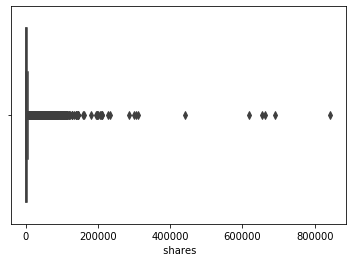

In [177]:
sns.boxplot(data[' shares']);


In [12]:
from scipy.stats.mstats import winsorize
def no_outliers(data):
    cols = list(data)
    for column in cols:
        if column in data.select_dtypes(include=np.number).columns:
            data[column] = winsorize(data[column], limits=[0.05, 0.1],inclusive=(True, True))
    return data

bank=no_outliers(data)

detect_outliers(data)

,Feature,Number of Outliers
0,n_tokens_title,0
1,n_tokens_content,0
2,n_unique_tokens,0
3,n_non_stop_words,2327
4,n_non_stop_unique_tokens,0
5,num_hrefs,0
6,num_self_hrefs,0
7,num_imgs,7703
8,num_videos,0
9,average_token_length,0


# Analyzing Data

Text(0, 0.5, 'count')

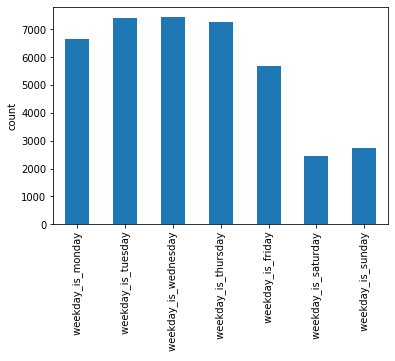

In [178]:
days = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
               ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']
data[days].sum().plot(kind='bar')
plt.ylabel('count')

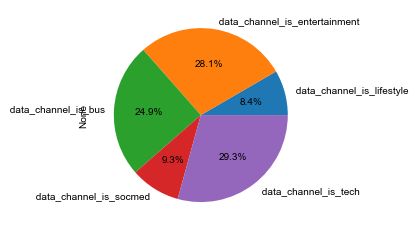

In [179]:
channel = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed',
               ' data_channel_is_tech']
data[channel].sum().plot(kind='pie', autopct='%1.1f%%')
sns.set(rc={'figure.figsize':(16, 10)});

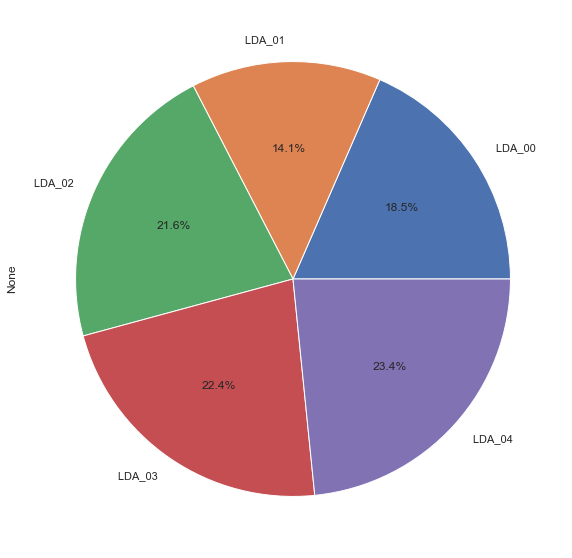

In [180]:
topic = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03',
               ' LDA_04']
data[topic].sum().plot(kind='pie', autopct='%1.1f%%')
sns.set(rc={'figure.figsize':(16, 10)});

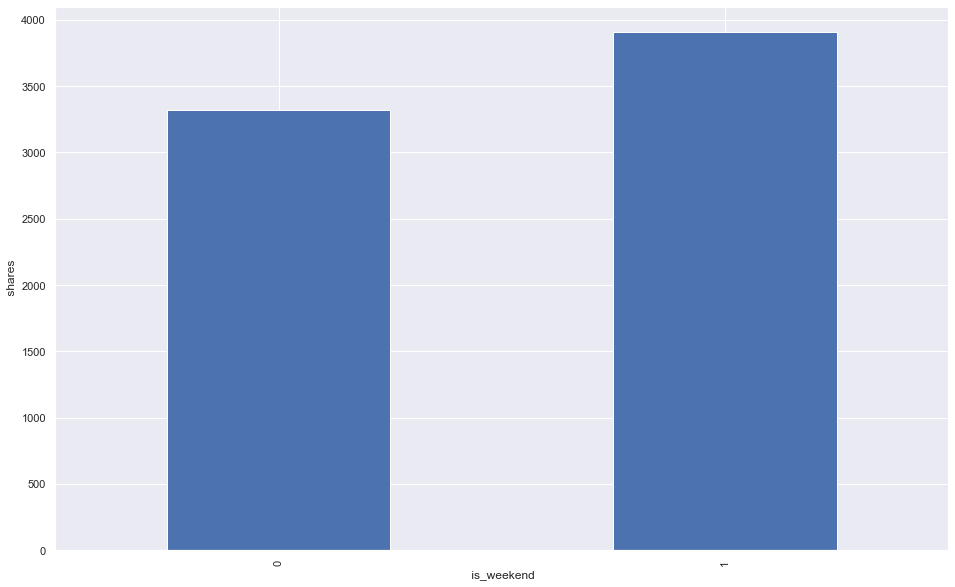

In [181]:
data.groupby(' is_weekend')[' shares'].mean().plot(kind='bar') 
plt.ylabel(' shares')
sns.set(rc={'figure.figsize':(16, 10)});

# Feauture Engineering

In [16]:
# Dividing shares into 5 groups of popularity
shares = data[' shares']
shares_label = list()
for shares in shares:
    if shares <= 1000:
        shares_label.append('Very Low')
    elif shares > 1000 and shares <= 10000:
        shares_label.append('Low')
    elif shares > 10000 and shares <= 30000:
        shares_label.append('Medium')
    elif shares > 30000 and shares <= 98700:
        shares_label.append('High')
    else:
        shares_label.append('Very High')
        
data = pd.concat([data, pd.DataFrame(shares_label, columns=['popularity'])], axis=1)
data.head(4)

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.041263,0.040123,0.092562,0.045662,0.013699,0.378636,-0.350000,-0.1875,593,Very Low
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.050101,0.050001,0.148948,0.043137,0.015686,0.286915,-0.123810,0.0000,711,Very Low
2,http://mashable.com/2013/01/07/apple-40-billio...,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.033334,0.682188,0.236250,0.056872,0.009479,0.464732,-0.466667,0.0000,1500,Low
3,http://mashable.com/2013/01/07/astronaut-notre...,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.028905,0.028572,0.100705,0.041431,0.020716,0.385965,-0.369697,0.0000,1200,Low


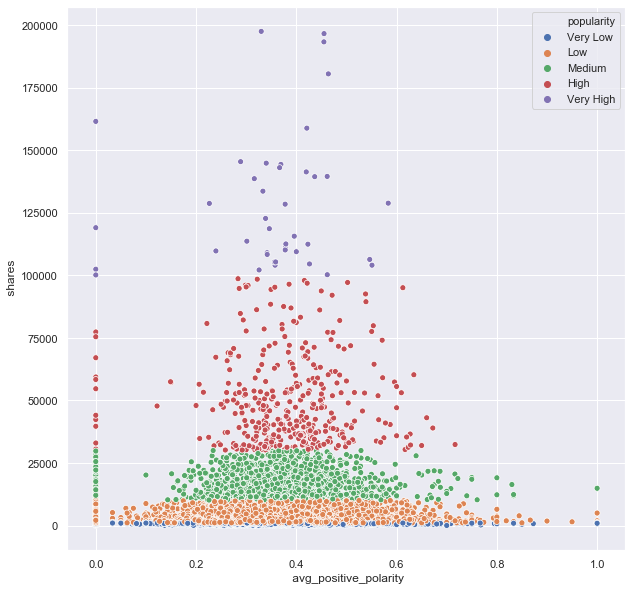

In [187]:
temp_data = data[data[' shares'] <= 200000]
fig, axes = plt.subplots(figsize=(10,10))
sns.scatterplot(x=' avg_positive_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)

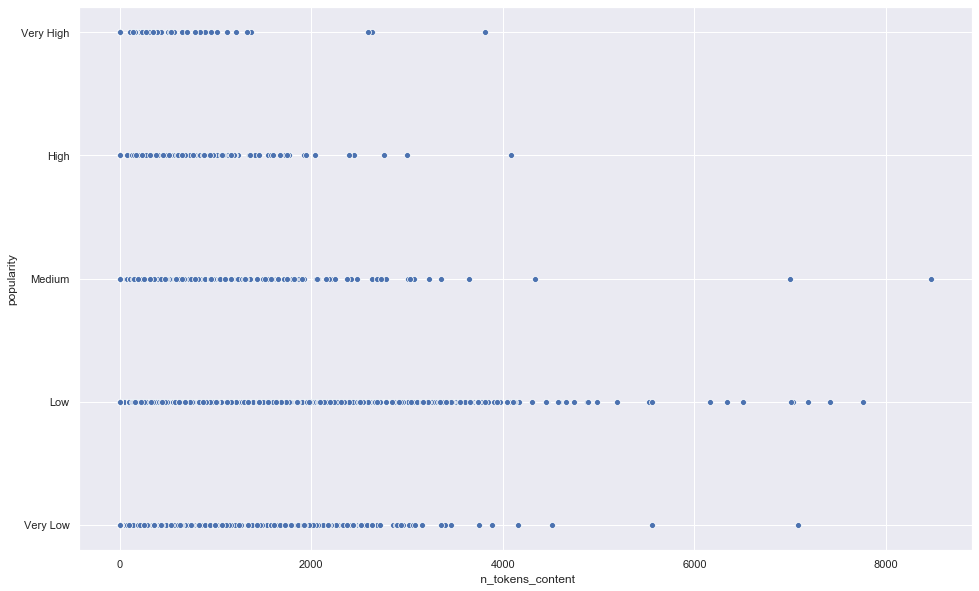

In [56]:
sns.scatterplot(x=' n_tokens_content',y='popularity', data=data)

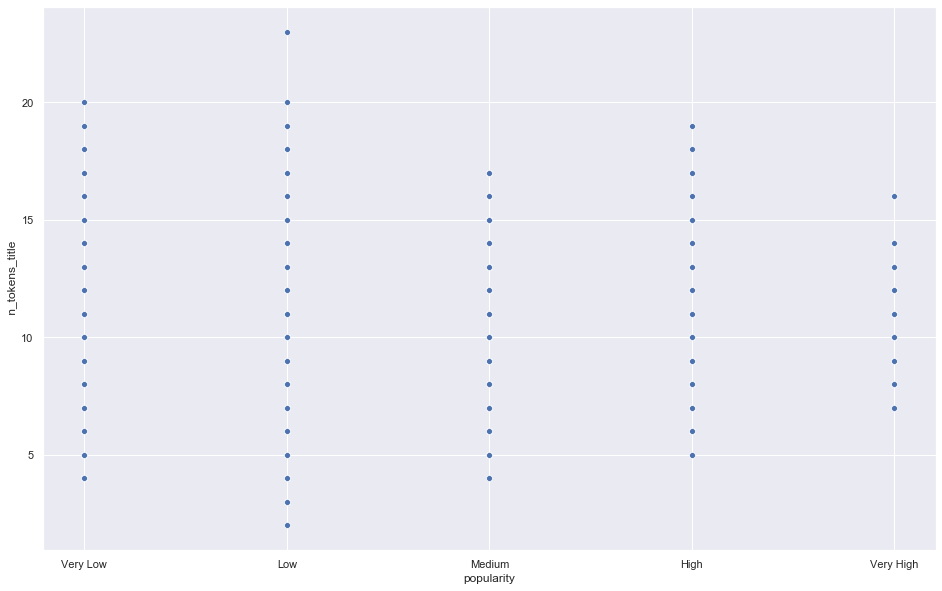

In [61]:
sns.scatterplot(y=' n_tokens_title',x='popularity', data=data)

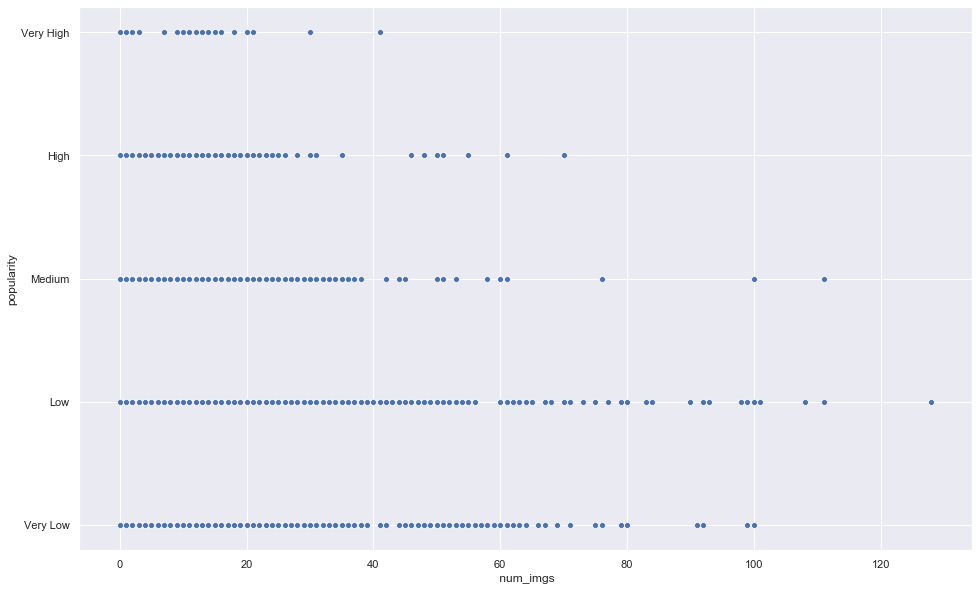

In [62]:
sns.scatterplot(x=' num_imgs',y='popularity', data=data)

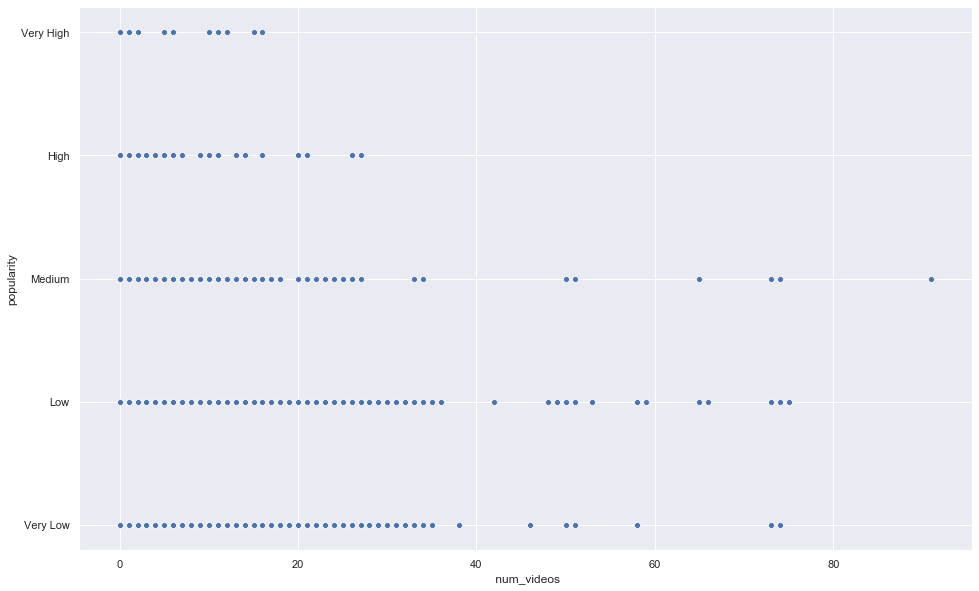

In [63]:
sns.scatterplot(x=' num_videos',y='popularity', data=data)

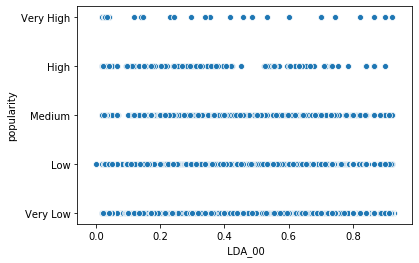

In [6]:
sns.scatterplot(x=' LDA_00',y='popularity', data=data)

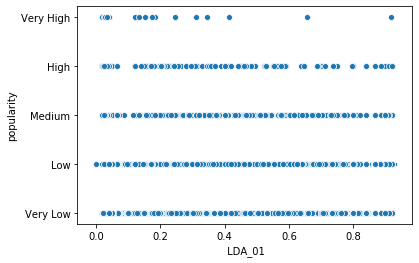

In [11]:
sns.scatterplot(x=' LDA_01',y='popularity', data=data)



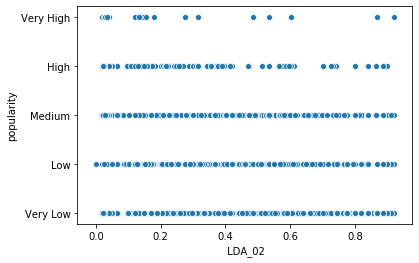

In [12]:
sns.scatterplot(x=' LDA_02',y='popularity', data=data)

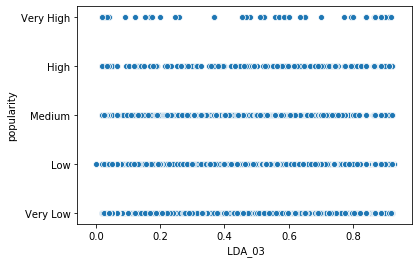

In [13]:
sns.scatterplot(x=' LDA_03',y='popularity', data=data)

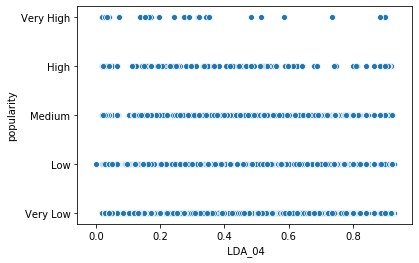

In [14]:
sns.scatterplot(x=' LDA_04',y='popularity', data=data)

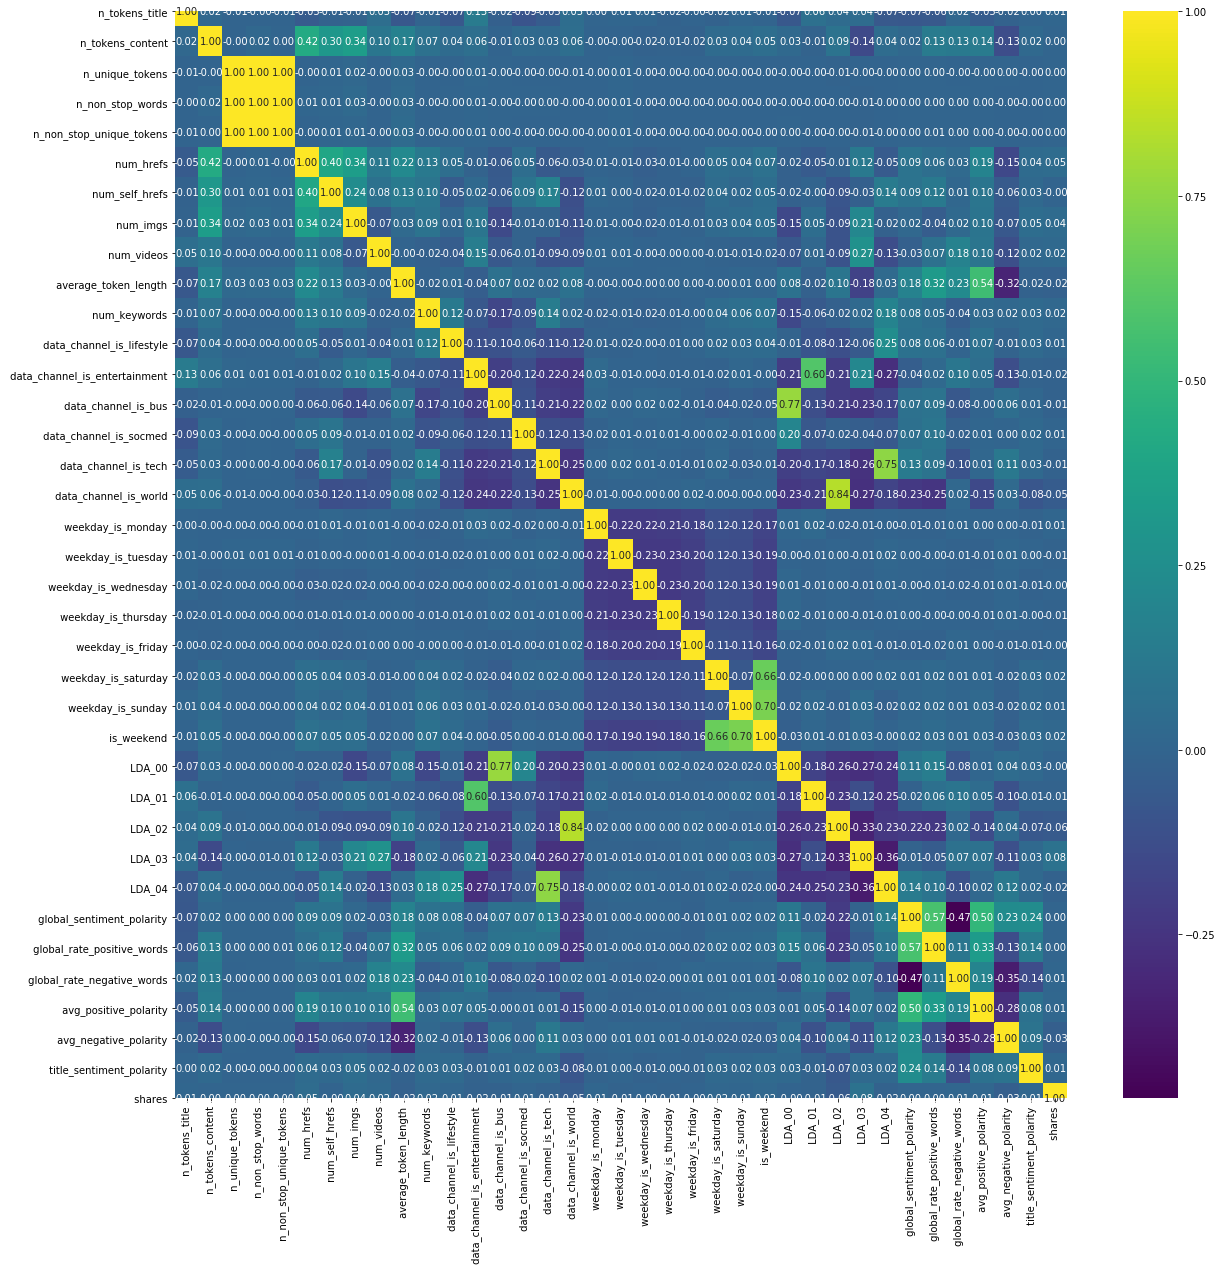

In [15]:
#to check correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='viridis',annot=True,fmt='.2f')
plt.show()

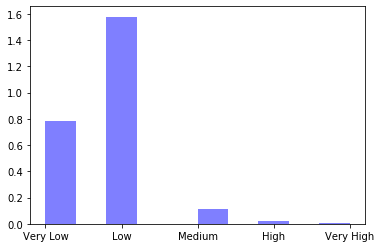

In [16]:
num_bins = 10
plt.hist(data['popularity'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

In [191]:
from sklearn.model_selection import train_test_split
# Split by putting 25% in the testing set
all_data=[' n_tokens_title', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
         ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday',
         ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', 
         ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_sentiment_polarity', ' global_rate_positive_words',
         ' global_rate_negative_words', ' avg_positive_polarity', ' avg_negative_polarity', ' title_sentiment_polarity']
X=data2[all_data]
y=data2[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.25,
                                                    random_state=42)

In [192]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(27754, 26) (27754,)
(9252, 26) (9252,)


In [193]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [85]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 34.57 degrees.


In [86]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 52.98 %.


In [50]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(data2,(importance, 2)) for data2, importance in zip(data2, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:  title_sentiment_polarity Importance: (0.9999999990941043, 2)
Variable:  n_non_stop_words    Importance: (7.081470141657572e-11, 2)
Variable:  global_sentiment_polarity Importance: (6.062425585849096e-11, 2)
Variable:  n_tokens_content    Importance: (5.754719706995619e-11, 2)
Variable:  LDA_04              Importance: (5.6382663650068825e-11, 2)
Variable:  num_videos          Importance: (5.459535240934834e-11, 2)
Variable:  LDA_02              Importance: (5.3786068319576054e-11, 2)
Variable:  is_weekend          Importance: (5.062257340858581e-11, 2)
Variable:  global_rate_negative_words Importance: (5.038548329017878e-11, 2)
Variable:  avg_positive_polarity Importance: (4.910248653510537e-11, 2)
Variable:  n_tokens_title      Importance: (4.636628404573303e-11, 2)
Variable:  LDA_03              Importance: (4.11381421651641e-11, 2)
Variable:  global_rate_positive_words Importance: (4.003448311320867e-11, 2)
Variable:  LDA_00              Importance: (3.8532479500441994e-1

In [87]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred


array([ 50, 144,  57,  82,  82,  48,  57,  82, 144, 144,  48,  49,  48,
        57, 156,  82, 144,  57,  57,  82, 144, 103,  48,  77,  82,  59,
        65,  82, 109,  57,  49,  57,  82,  57, 162, 144], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix,classification_report
print(f'Accuracy : {100 * accuracy_score(y_pred,y_test)}')


Accuracy : 2.7777777777777777


In [89]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
sv.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = sv.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9628552971576227


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [44]:
shares=data[' shares']

In [157]:
Q1 = data[' shares'].quantile(0.25)
Q3 = data[' shares'].quantile(0.55)
#shares_new[(shares_new >= Q1) & (surveys_df.year <= Q2)]
IQR=Q3-Q1
fence_low = Q1 - (1.5*IQR)
fence_high = Q3 + (1.5*IQR)

In [158]:
Q3

1600.0

In [159]:
data[(data[' shares'] < fence_low) | (data[' shares'] > fence_high)]

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
8,http://mashable.com/2013/01/07/car-of-the-futu...,11,97,0.670103,1.0,0.836735,2,0,0,0,...,0.028662,0.029696,0.454412,0.161111,0.030928,0.020619,0.566667,-0.125000,0.000000,3600
13,http://mashable.com/2013/01/07/dad-jokes/,9,285,0.744186,1.0,0.841530,4,2,0,21,...,0.033352,0.866499,0.033337,-0.053085,0.028070,0.052632,0.457500,-0.337889,-1.000000,10000
16,http://mashable.com/2013/01/07/echo-game/,8,1118,0.512397,1.0,0.709770,26,18,12,1,...,0.040028,0.839742,0.040006,0.056379,0.041145,0.025939,0.504529,-0.401437,-0.100000,13600
17,http://mashable.com/2013/01/07/entrepreneur-tr...,8,397,0.624679,1.0,0.805668,11,0,1,0,...,0.033334,0.033333,0.033333,0.212488,0.065491,0.010076,0.381847,-0.144643,0.000000,3100
18,http://mashable.com/2013/01/07/facebook-sick-app/,11,103,0.689320,1.0,0.806452,3,1,1,0,...,0.033457,0.033403,0.295403,0.118056,0.029126,0.009709,0.277778,-0.125000,-0.714286,5700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39612,http://mashable.com/2014/12/26/tesla-roadster-...,11,735,0.505698,1.0,0.626582,32,3,1,1,...,0.458690,0.028572,0.028574,0.018041,0.024490,0.023129,0.351924,-0.232715,-0.500000,3000
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,11,0,0.000000,0.0,0.000000,0,0,21,1,...,0.499228,0.440050,0.020378,0.000000,0.000000,0.000000,0.000000,0.000000,0.136364,5700
39621,http://mashable.com/2014/12/26/ukraine-prisone...,9,468,0.582781,1.0,0.691318,17,1,1,0,...,0.066669,0.733264,0.066668,0.006884,0.019231,0.021368,0.331481,-0.282500,0.000000,24300
39622,http://mashable.com/2014/12/26/wacky-kickstart...,11,1122,0.439421,1.0,0.635258,4,1,6,0,...,0.692963,0.022223,0.125983,0.086142,0.038324,0.021390,0.346349,-0.262500,0.166667,2900


In [160]:
data2=data[(data[' shares'] > fence_low) & (data[' shares'] < fence_high)]
data2

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.040005,0.041263,0.040123,0.092562,0.045662,0.013699,0.378636,-0.350000,-0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.050096,0.050101,0.050001,0.148948,0.043137,0.015686,0.286915,-0.118750,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.033351,0.033334,0.682188,0.323333,0.056872,0.009479,0.495833,-0.466667,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.494651,0.028905,0.028572,0.100705,0.041431,0.020716,0.385965,-0.369697,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.028575,0.028572,0.885427,0.281003,0.074627,0.012127,0.411127,-0.220192,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,11,346,0.529052,1.0,0.684783,9,7,1,1,...,0.151701,0.025000,0.773260,0.141964,0.037572,0.014451,0.333791,-0.260000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,12,328,0.696296,1.0,0.885057,9,7,3,48,...,0.231866,0.681635,0.028575,0.194249,0.039634,0.009146,0.374825,-0.211111,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,10,442,0.516355,1.0,0.644128,24,1,12,1,...,0.025207,0.643794,0.146970,0.024609,0.033937,0.024887,0.307273,-0.356439,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,6,682,0.539493,1.0,0.692661,10,1,1,0,...,0.839987,0.040002,0.040004,-0.008066,0.020528,0.023460,0.236851,-0.205246,0.000000,1100


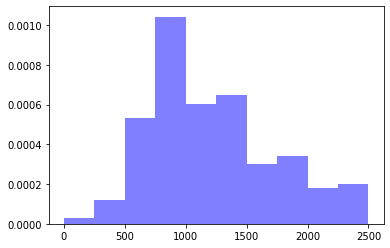

In [161]:
num_bins = 10
plt.hist(data2[' shares'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

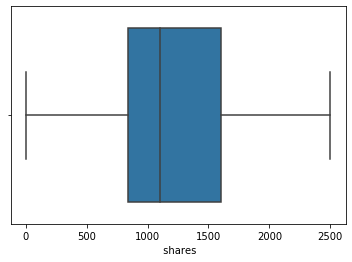

In [162]:
sns.boxplot(data2[' shares']);